Functions - Gradient descent

In [7]:
import numpy as np

def normalization(x):
    mean_x = np.mean(x,axis=0)
    std_x = np.std(x,axis=0)
    norm_x = (x - mean_x)/std_x
    
    return norm_x

def compute_cost(theta, x, y):
    h = x.dot(theta)
    dist = (h.T - y)**2
    sum_dist = np.sum(dist)
    m = len(y)
    j2 = 1/(2*m)*sum_dist

    return j2

def compute_gradient_descent(theta, x, y, a, iters):
    m = len(y)
    J_history = np.zeros(iters)
    for iter in range(iters):
        h = x.dot(theta)
        dist = h.T - y
        
        for i in range(len(theta)):
            theta_i_temp = dist * x[:, i]
            theta_i_temp = np.sum(theta_i_temp)
            theta_i_temp = theta_i_temp * a/m
            theta[i, 0] = theta[i, 0] - theta_i_temp

        J_history[iter] = compute_cost(theta, x, y)
    return theta, J_history



Variebles - Gradient descent

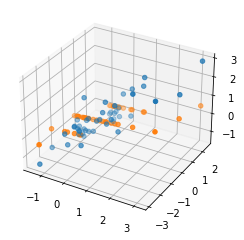

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# take csv file and show data frame

header_list = ["Size", "Bedrooms", "Price"]
df = pd.read_csv(r"C:\Users\ShlomiAtedgi\Desktop\ML\ex1data2.txt", sep=",", names=header_list)
# print(df)

# linear regression

x = df.iloc[:, :-1].to_numpy()
x = normalization(x)
y = df.iloc[:, -1].to_numpy()
y = normalization(y)

#df.plot(x="Population",y="Profit", kind="scatter")
#plt.show()

# print(feature_metrix)

# array

iterations = 1500
alpha = 0.0001

ones_column = np.ones([len(y), 1], dtype="int")
feature_metrix = np.append(ones_column, x, axis=1)
theta_init = np.zeros([feature_metrix.shape[1], 1])
theta_f, j_history = compute_gradient_descent(theta_init, feature_metrix, y, alpha, iterations)

hf = feature_metrix.dot(theta_f).flatten()
ones, size, bedrooms = feature_metrix.T

ax = plt.axes(projection='3d')
ax.scatter3D(size, bedrooms, y, "blue")
ax.scatter3D(size, bedrooms, hf, "red")
plt.show()



Normal Equations

In [9]:
def compute_Normal_Equations(x, y):
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

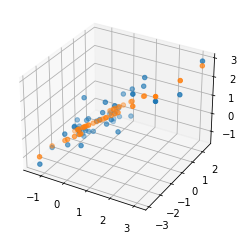

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# take csv file and show data frame

header_list = ["Size", "Bedrooms", "Price"]
df = pd.read_csv(r"C:\Users\ShlomiAtedgi\Desktop\ML\ex1data2.txt", sep=",", names=header_list)
# print(df)

# linear regression

x = df.iloc[:, :-1].to_numpy()
x = normalization(x)
y = df.iloc[:, -1].to_numpy()
y = normalization(y)

ones_column = np.ones([len(y), 1], dtype="int")
feature_metrix = np.append(ones_column, x, axis=1)
theta_f = compute_Normal_Equations(feature_metrix, y)

hf = feature_metrix.dot(theta_f).flatten()
_, size, bedrooms = feature_metrix.T

ax = plt.axes(projection='3d')
ax.scatter3D(size, bedrooms, y, "blue")
ax.scatter3D(size, bedrooms, hf, "red")
plt.show()
